In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data set
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [3]:
# Data Exploration -- Training Data
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Check the info of the dataframe
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Drop unnecessary columns that contain string data
train_data = train_df.copy()
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [7]:
# Checking for missing values
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


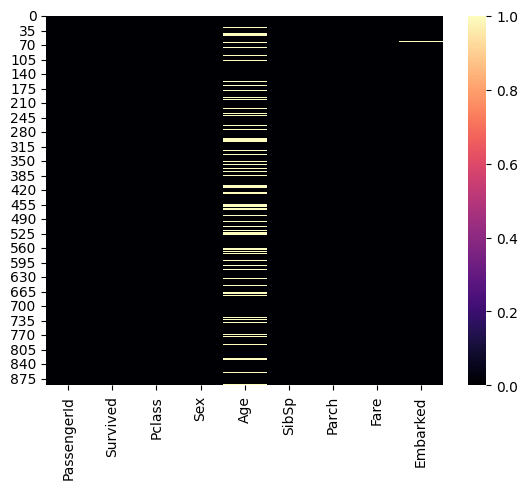

In [8]:
# confirming with heatmap
sns.heatmap(train_data.isnull(), cmap = 'magma')
plt.show()

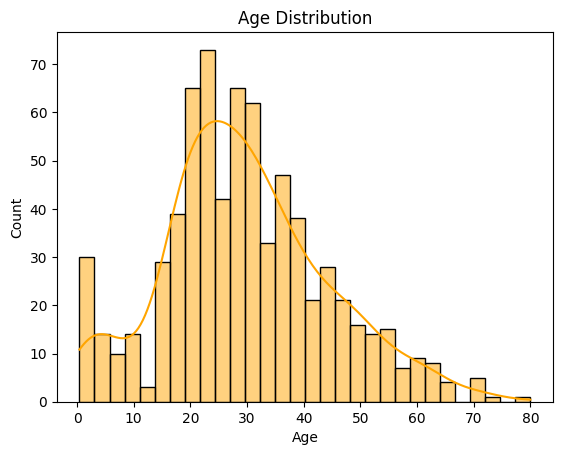

In [9]:
# Visualization
# Histogram of 'Age'
sns.histplot(train_data['Age'], kde = True, bins = 30, color = 'orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Age distribution is right-skewed. So using mean imputation might give us biased results by filling in ages that are older than the desired. Hence, we'll use median imputation values.

There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.



<ipython-input-10-daafb3ed7a3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=train_data, palette='magma')


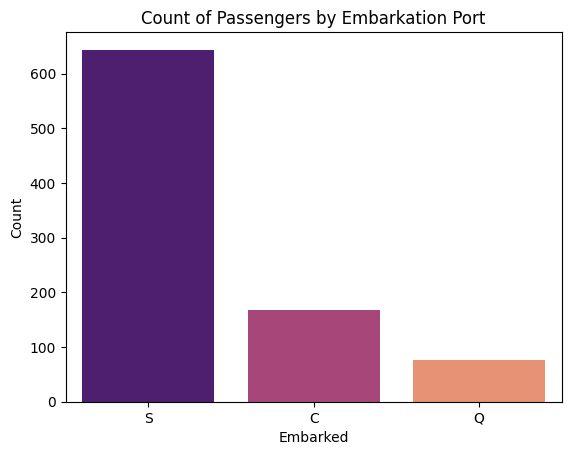

In [10]:
# Countplot of 'Embarked'
sns.countplot(x='Embarked', data=train_data, palette='magma')
plt.title('Count of Passengers by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [11]:
# Missing value Imputation
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Handling Embarked
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<ipython-input-11-acc67df20a49>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-11-acc67df20a49>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


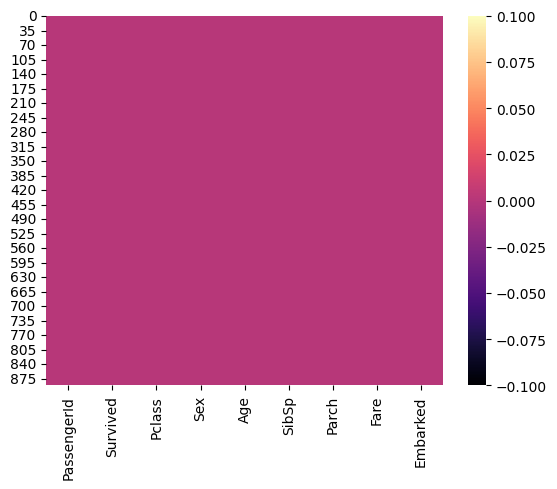

In [12]:
# Check missing values are adjusted
print(train_data.isnull().sum())

# Confirming with heat map
sns.heatmap(train_data.isnull(), cmap = 'magma')
plt.show()

In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Data Exploration -- Testing Data
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
# Check the info of the dataframe
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [16]:
# Summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Drop uneccessary columns that contain string data
test_data = test_df.copy()
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


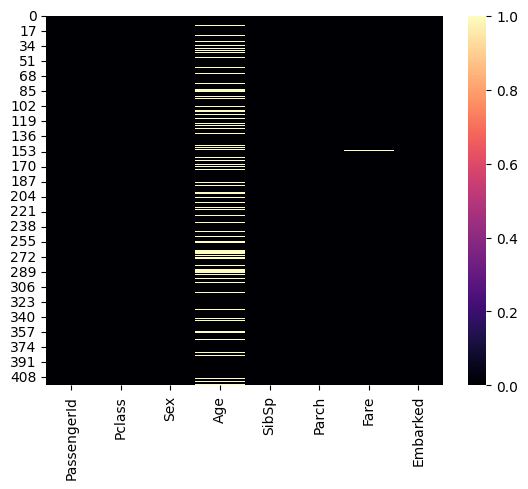

In [18]:
# Checking fro missing values
print(test_data.isnull().sum())

# Confirming using heatmap
sns.heatmap(test_data.isnull(), cmap = 'magma')
plt.show()

In [19]:
# Missing Value Imputation
test_data['Age'].fillna(test_df['Age'].median(skipna = True), inplace = True)
test_data['Fare'].fillna(test_df['Fare'].median(skipna = True), inplace = True)
test_data

<ipython-input-19-72167f8f644e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_df['Age'].median(skipna = True), inplace = True)
<ipython-input-19-72167f8f644e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,27.0,0,0,8.0500,S


<ipython-input-20-c5a959a41bef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette='magma')


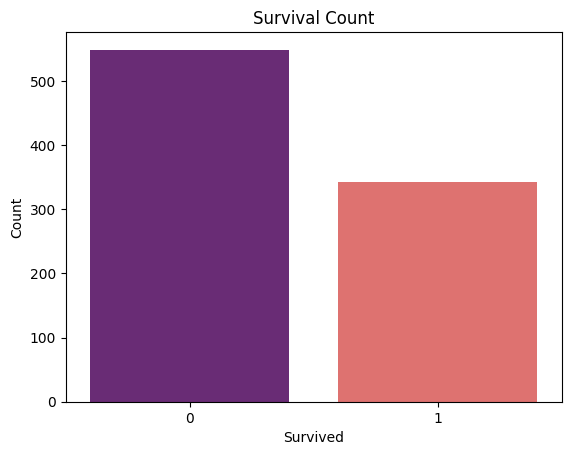

In [20]:
# DATA VISUALISATION
# Survival Count
sns.countplot(x='Survived', data=train_data, palette='magma')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

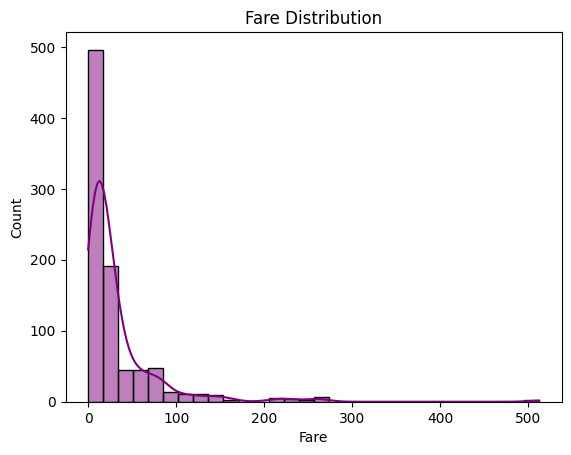

In [21]:
# Fare Distribution
sns.histplot(train_data['Fare'], kde=True, bins=30, color='purple')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

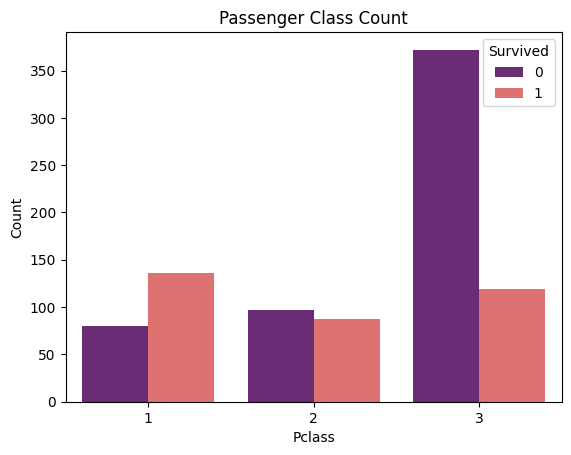

In [22]:
# Passenger Class Count
sns.countplot(x='Pclass', hue = 'Survived', data=train_data, palette='magma')
plt.title('Passenger Class Count')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

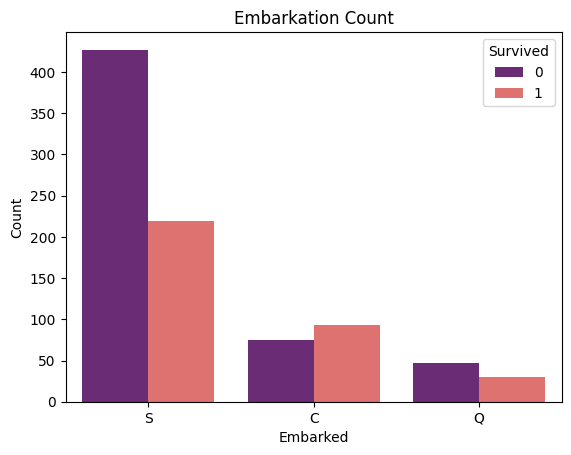

In [23]:
# Embarkation count
sns.countplot(x='Embarked',hue = 'Survived', data=train_data, palette='magma')
plt.title('Embarkation Count')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

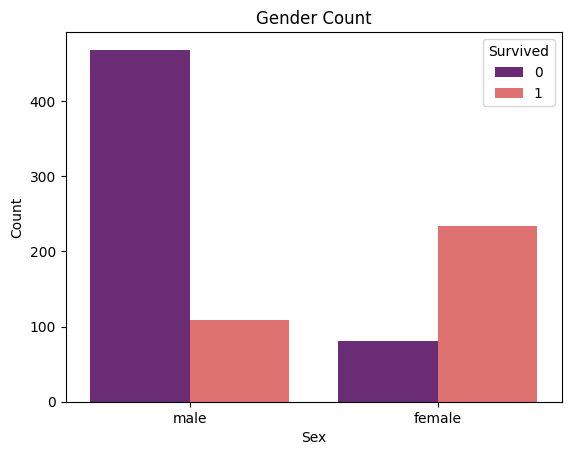

In [24]:
# Gender Count
sns.countplot(x='Sex', hue = 'Survived', data=train_data, palette='magma')
plt.title('Gender Count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [25]:
# DATA PRE-PROCESSING
# Label Encoding the categorical column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])   # male = 1, female = 0
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])  # C = 0, Q = 1, S = 2
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [26]:
# Label Encoding the categorical column 'test_data'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])   # male = 1, female = 0
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])  # C = 0, Q = 1, S = 2
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,27.0,0,0,8.0500,2


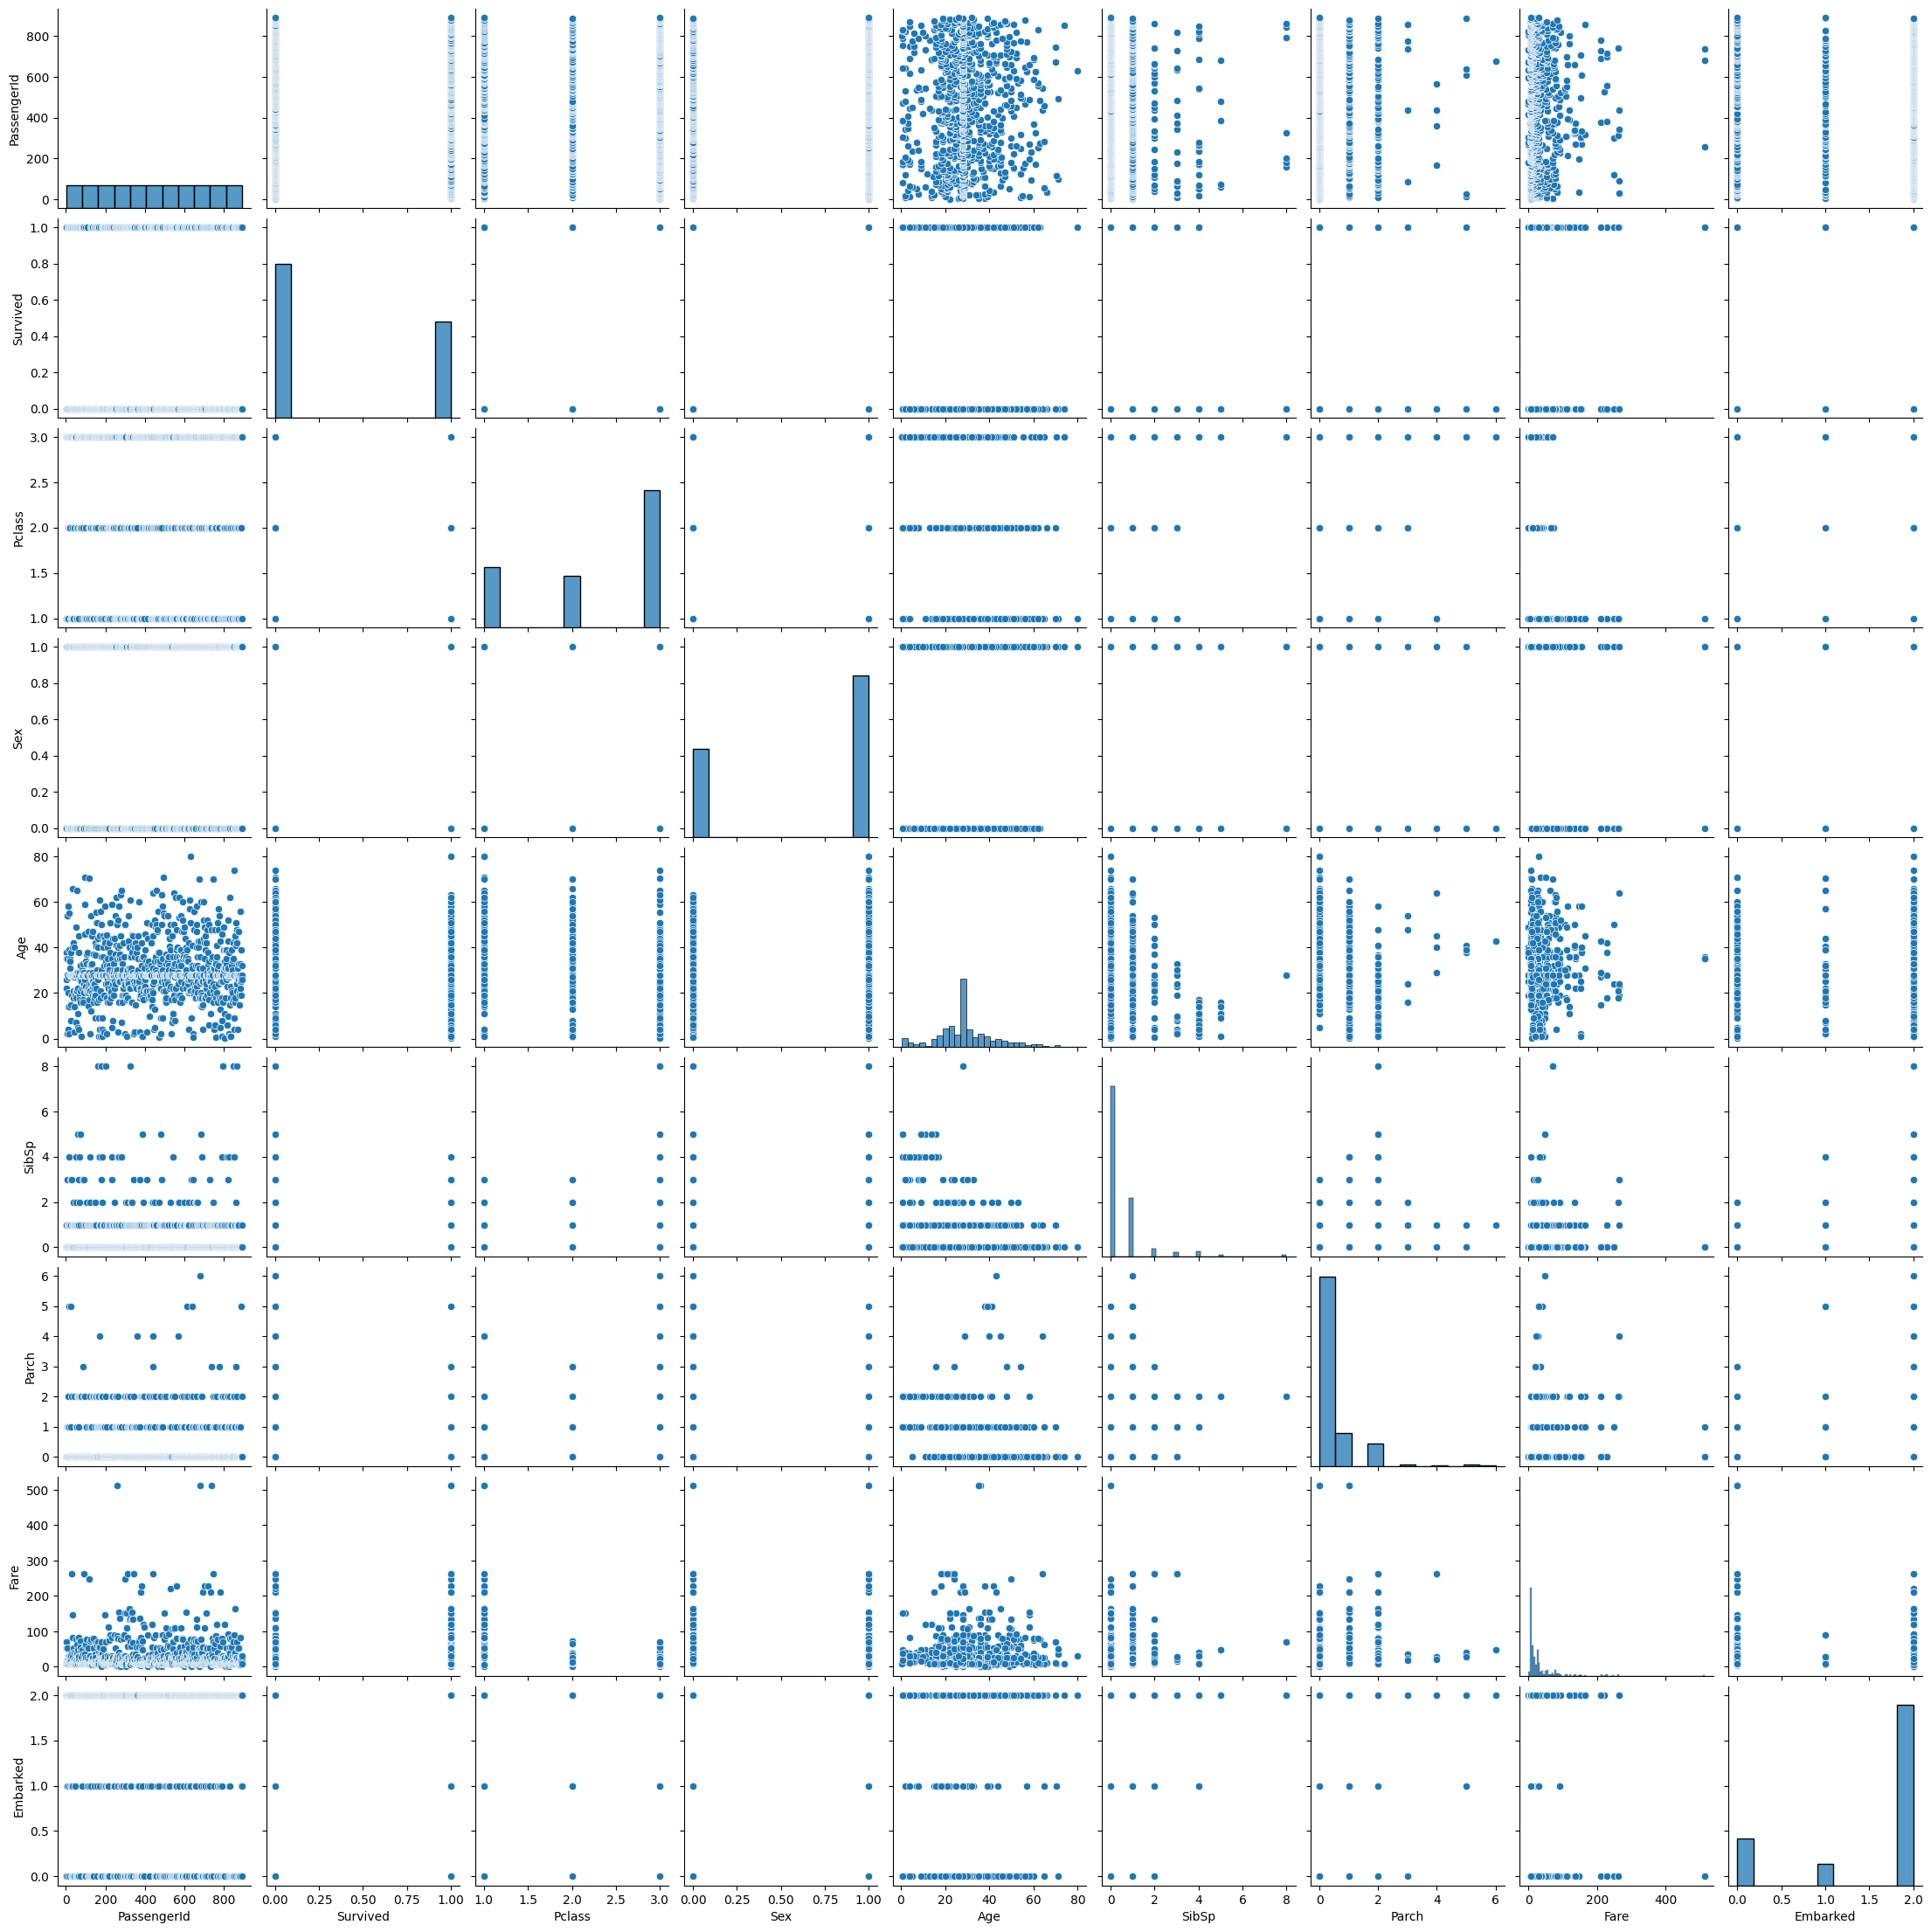

In [27]:
# Checking Correlation
sns.pairplot(train_data)
plt.show()

In [28]:
# Correlation matrix
corr_matrix = train_data.corr()
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


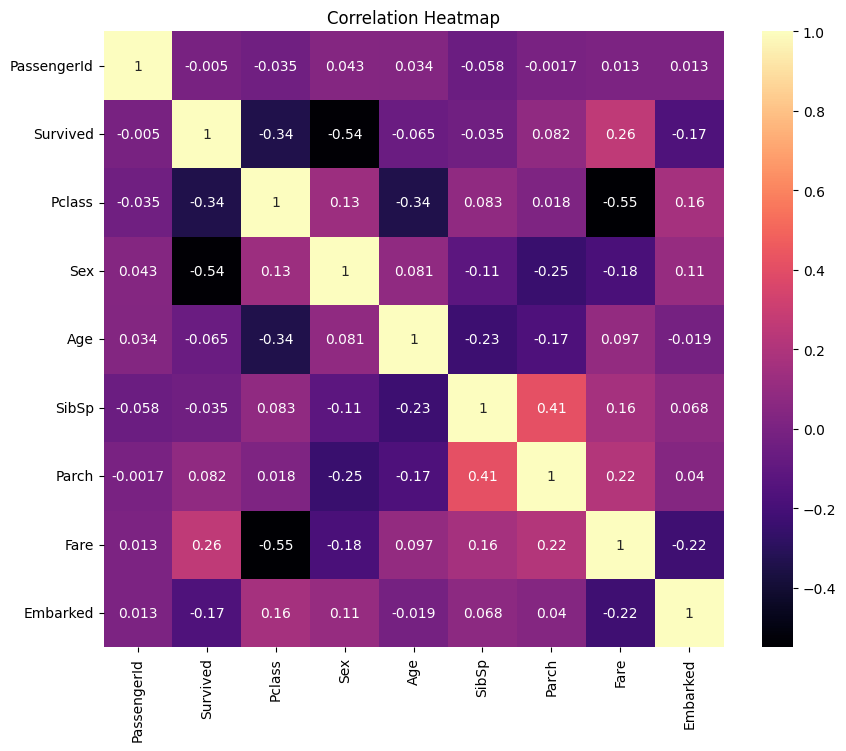

In [29]:
# Correlation Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap = 'magma')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# Data Splitting
# Feature and Target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# splitting data for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# MODEL BUILDING
from sklearn.linear_model import LogisticRegression

# Build the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Predictions
y_pred_train = logmodel.predict(X_train)
y_pred_proba_train = logmodel.predict_proba(X_train)[:,1]

# Predicting test values
y_pred_test = logmodel.predict(X_test)
y_pred_proba_test = logmodel.predict_proba(X_test)[:,1]

Confusion matrix: 
 [[89 16]
 [23 51]]


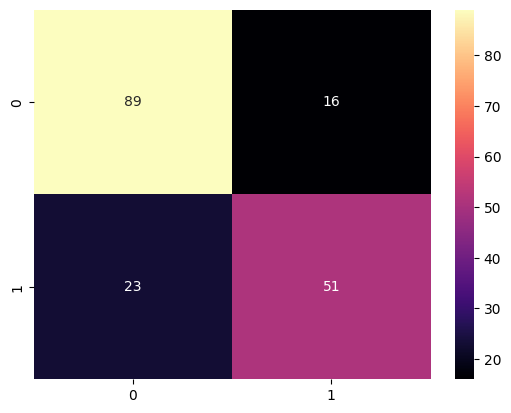

In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix: \n', cm)

# Visualising by heatmap
sns.heatmap(cm, annot=True, cmap = 'magma')
plt.show()

In [35]:
# MODEL EVALUATION
# Training Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluation metrics
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
auc = roc_auc_score(y_train, y_pred_train)

print('Accuracy:',np.round(accuracy,2))
print('Precision:', np.round(precision,2))
print('Recall: ',np.round(recall,2))
print('F1 Score:',np.round(f1,2))
print('ROC Area Under Curve:',np.round(auc,2))

Accuracy: 0.8
Precision: 0.76
Recall:  0.68
F1 Score: 0.72
ROC Area Under Curve: 0.77


In [36]:
# Test Model Evaluation
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

print('Accuracy:',np.round(accuracy,2))
print('Precision:', np.round(precision,2))
print('Recall: ',np.round(recall,2))
print('F1 Score:',np.round(f1,2))
print('ROC Area Under Curve:',np.round(auc,2))

Accuracy: 0.78
Precision: 0.76
Recall:  0.69
F1 Score: 0.72
ROC Area Under Curve: 0.77


In [37]:
# Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logmodel, X_train, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))

Cross-validation scores: [0.78321678 0.83216783 0.8028169  0.73943662 0.81690141]
Mean cross-validation score: 0.794907908992416


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

<ipython-input-38-82978b9e5a84>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--',color = 'blue', label = 'Random Guess')


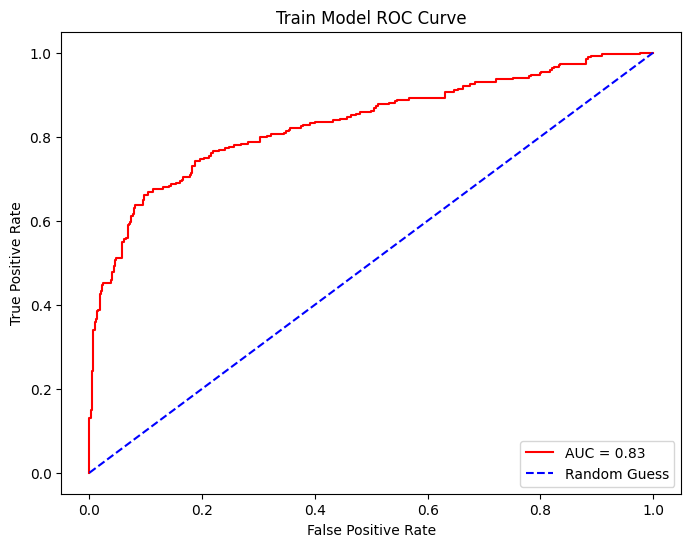

In [38]:
# ROC CURVE
# Training model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr, label = f'AUC = {auc(fpr,tpr):.2f}', color = 'red')
plt.plot([0,1],[0,1],'k--',color = 'blue', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Model ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

<ipython-input-39-067cdd2dac7f>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--',color = 'blue', label = 'Random Guess')


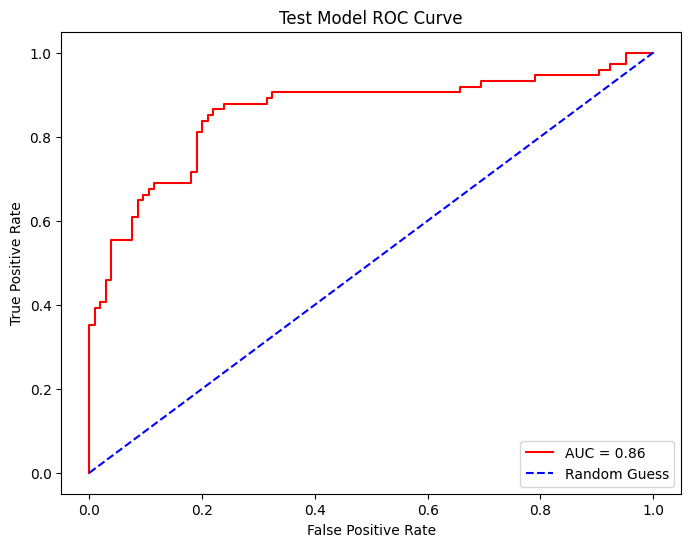

In [39]:
# ROC CURVE --> Test Model
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr, label = f'AUC = {auc(fpr,tpr):.2f}', color = 'red')
plt.plot([0,1],[0,1],'k--',color = 'blue', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Model ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

In [40]:
from sklearn.metrics import classification_report
print("Training Model Classification Report")
print (classification_report(y_train, y_pred_train))

print("Test Model Classification Report")
print (classification_report(y_test, y_pred_test))

Training Model Classification Report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       444
           1       0.76      0.68      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.77      0.78       712
weighted avg       0.80      0.80      0.80       712

Test Model Classification Report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [41]:
# INTERPRETING COEFFICIENTS
coef = pd.DataFrame({'Feature':train_data.drop(columns = ['Survived']).columns,
                     'Coefficient':logmodel.coef_[0]})
coef['Impact'] = coef['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
coef.sort_values(by = 'Coefficient', ascending = False, inplace = True)
print(coef)

       Feature  Coefficient    Impact
6         Fare     0.005979  Positive
0  PassengerId     0.000374  Positive
3          Age    -0.007777  Negative
7     Embarked    -0.018799  Negative
4        SibSp    -0.182814  Negative
5        Parch    -0.240414  Negative
1       Pclass    -0.306156  Negative
2          Sex    -2.404790  Negative


In [51]:
# PREDICTION USING TEST DATA
prediction = logmodel.predict(test_data)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
submission = pd.DataFrame({"Survived":prediction})
submission.to_csv('TitanicPrediction.csv', index = False)

In [57]:
prediction_df = pd.read_csv('TitanicPrediction.csv')
prediction_df.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [58]:
prediction_df['Survived'].value_counts()

,count
Survived,
0,264
1,154


In [63]:
# DEPLOYMENT
# Getting the test file for deployment
titanic_deployment_data = pd.concat([prediction_df, test_data], axis = 1)

# Making first column 'Survive'
passenger_id = titanic_deployment_data['PassengerId']

# Remove 'PassengerId' from original dataframe
titanic_deployment_data = titanic_deployment_data.drop('PassengerId', axis = 1)

# Insert the PassengerId as second column
titanic_deployment_data.insert(1, 'PassengerId', passenger_id)

# Display the modified data
titanic_deployment_data

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,892,3,1,34.5,0,0,7.8292,1
1,1,893,3,0,47.0,1,0,7.0000,2
2,0,894,2,1,62.0,0,0,9.6875,1
3,0,895,3,1,27.0,0,0,8.6625,2
4,1,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,0,1305,3,1,27.0,0,0,8.0500,2
414,1,1306,1,0,39.0,0,0,108.9000,0
415,0,1307,3,1,38.5,0,0,7.2500,2
416,0,1308,3,1,27.0,0,0,8.0500,2


In [64]:
titanic_deployment_data.to_csv('Titanic_deployment_data.csv', index = False)